# Regression Analysis
** What is Regression Analysis? **
In statistics, linear regression is an approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. (wikipedia)

In [152]:
# libraries needed
library(caTools)
library(ggplot2)
library(e1071) # for Support Vector Regression
library(rpart) # for Decision Tree Regression
library(randomForest) # for Random Forest Regression

## Simple Linear Regression
#### y = b0 + b1\*x1
**Let's find out the relationship between YearsExperience (independent variable or iv) and Salary (dependent variable)**


In [19]:
# Importing the dataset
dataset = read.csv('Salary_Data.csv')

In [3]:
head(dataset)

YearsExperience,Salary
1.1,39343
1.3,46205
1.5,37731
2.0,43525
2.2,39891
2.9,56642


In [20]:
# Splitting the dataset into the Training set and Test set
# install.packages('caTools')

set.seed(123) # use seed to get consistent results across executions
split = sample.split(dataset$Salary, SplitRatio = 2/3)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

In [21]:
# Fitting Simple Linear Regression to the Training set
# use training set to define linear regression model between Salar and YearsExperience
regressor = lm(formula = Salary ~ YearsExperience,
               data = training_set)

In [22]:
# Predicting the Test set results
# this will give us an indication of how good the regression model was
y_pred = predict(regressor, newdata = test_set)

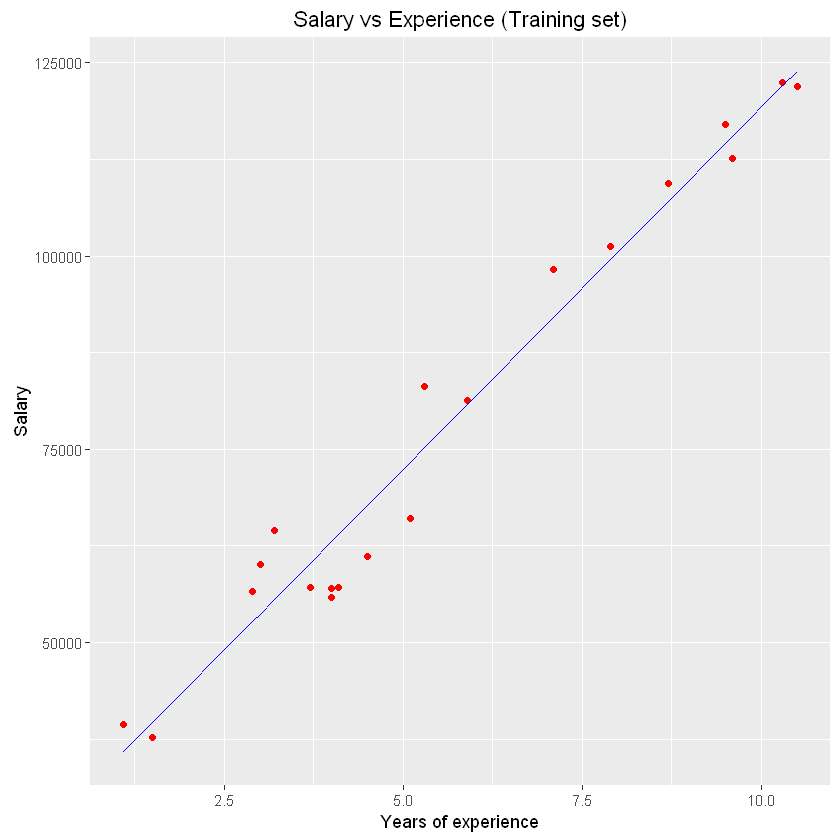

In [9]:
# Visualising the Training set results
ggplot() +
  geom_point(aes(x = training_set$YearsExperience, y = training_set$Salary),
             colour = 'red') +
  geom_line(aes(x = training_set$YearsExperience, y = predict(regressor, newdata = training_set)),
            colour = 'blue') +
  ggtitle('Salary vs Experience (Training set)') +
  xlab('Years of experience') +
  ylab('Salary')

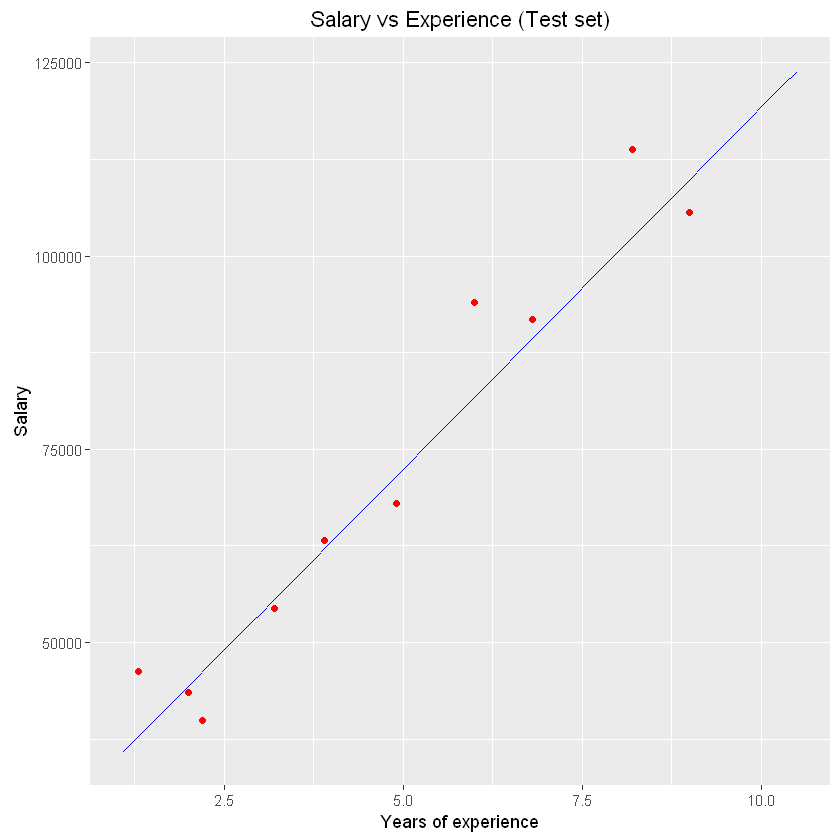

In [10]:
# Visualising the Test set results
ggplot() +
  geom_point(aes(x = test_set$YearsExperience, y = test_set$Salary),
             colour = 'red') +
  geom_line(aes(x = training_set$YearsExperience, y = predict(regressor, newdata = training_set)),
            colour = 'blue') +
  ggtitle('Salary vs Experience (Test set)') +
  xlab('Years of experience') +
  ylab('Salary')

In [31]:
# let's look at the model
summary(regressor)
# Signif. Codes indicates the significance of the independent variable 
# in this case three stars (***) means a strong significance
# Estimate value means for each unit of year (in this case 1 year),
# expect to see an increase in salary of 9365



Call:
lm(formula = Salary ~ YearsExperience, data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-7325.1 -3814.4   427.7  3559.7  8884.6 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        25592       2646   9.672 1.49e-08 ***
YearsExperience     9365        421  22.245 1.52e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5391 on 18 degrees of freedom
Multiple R-squared:  0.9649,	Adjusted R-squared:  0.963 
F-statistic: 494.8 on 1 and 18 DF,  p-value: 1.524e-14


In [30]:
# so what would be the salar with 15 years of experience?
# predict takes a regressor object and a dataframe 
# that has at least one column named YearsExperience
predict(regressor, data.frame(YearsExperience= c(15)))

1 
166068.4

## Multiple Linear Regression
#### y = b0 + b1\*x1 + b2\*x2 + ... + bN\*xN
**Let's find out the relationship between multiple (independent variables or iv) and Profit (dependent variable)**


In [35]:
# Importing the dataset
dataset = read.csv('50_Startups.csv')

In [36]:
head(dataset)
# there are four independent variables and 1 dependent variable (Profit)
# We want to find out which iv are/is most significant for predicting Profit

R.D.Spend,Administration,Marketing.Spend,State,Profit
165349.2,136897.80,471784.1,New York,192261.8
162597.7,151377.59,443898.5,California,191792.1
153441.5,101145.55,407934.5,Florida,191050.4
144372.4,118671.85,383199.6,New York,182902.0
142107.3,91391.77,366168.4,Florida,166187.9
131876.9,99814.71,362861.4,New York,156991.1


In [37]:
# Encoding categorical data
# since state is character, need to convert it to numeric for analysis
dataset$State = factor(dataset$State,
                       levels = c('New York', 'California', 'Florida'),
                       labels = c(1, 2, 3))

In [38]:
# Splitting the dataset into the Training set and Test set
set.seed(123)
split = sample.split(dataset$Profit, SplitRatio = 0.8)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

In [39]:
# Fitting Multiple Linear Regression to the Training set
# regressor = lm(formula = Profit ~ R.D.Spend + Administration + Marketing.Spend + State,
#     data = training_set)
# . implies all independent variables
regressor = lm(formula = Profit ~ .,
               data = training_set)

In [40]:
# Predicting the Test set results
y_pred = predict(regressor, newdata = test_set)

In [41]:
summary(regressor)
# this shows that R.D.Spend is the only significant iv


Call:
lm(formula = Profit ~ ., data = training_set)

Residuals:
   Min     1Q Median     3Q    Max 
-33128  -4865      5   6098  18065 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.965e+04  7.637e+03   6.501 1.94e-07 ***
R.D.Spend        7.986e-01  5.604e-02  14.251 6.70e-16 ***
Administration  -2.942e-02  5.828e-02  -0.505    0.617    
Marketing.Spend  3.268e-02  2.127e-02   1.537    0.134    
State2           1.213e+02  3.751e+03   0.032    0.974    
State3           2.376e+02  4.127e+03   0.058    0.954    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9908 on 34 degrees of freedom
Multiple R-squared:  0.9499,	Adjusted R-squared:  0.9425 
F-statistic:   129 on 5 and 34 DF,  p-value: < 2.2e-16


In [46]:
# Since R&D Spend is the only significant iv, you can build the lm 
# with Profit ~ R.D.Spend and the regressor will be the same
regressor2 = lm(formula = Profit ~ .,
               data = training_set)
y_pred2 = predict(regressor2, newdata = test_set)
all.equal(y_pred, y_pred2)

[1] TRUE

#### Backward Elimination process
** Do we have to use all the ivs in our model? What if there was an iv called governer? Would that really have any significance at all? One way to build an optimal model is to use a technique called Backward Elimination. **

In [47]:
# Use a rule that only ivs with significance level (SL) below 0.05 are usefull
# from previous summary of model, we see that State2/3 have very high p-values
# so let's eliminate them from the model
regressor = lm(formula = Profit ~ R.D.Spend + Administration + Marketing.Spend,
               data = dataset)
summary(regressor)
# we see that Administration 


Call:
lm(formula = Profit ~ R.D.Spend + Administration + Marketing.Spend, 
    data = dataset)

Residuals:
   Min     1Q Median     3Q    Max 
-33534  -4795     63   6606  17275 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.012e+04  6.572e+03   7.626 1.06e-09 ***
R.D.Spend        8.057e-01  4.515e-02  17.846  < 2e-16 ***
Administration  -2.682e-02  5.103e-02  -0.526    0.602    
Marketing.Spend  2.723e-02  1.645e-02   1.655    0.105    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9232 on 46 degrees of freedom
Multiple R-squared:  0.9507,	Adjusted R-squared:  0.9475 
F-statistic:   296 on 3 and 46 DF,  p-value: < 2.2e-16


In [48]:
# now we see that Administration has a p-value greater than 0.05
# so let's eliminate it from the model
regressor = lm(formula = Profit ~ R.D.Spend + Marketing.Spend,
               data = dataset)
summary(regressor)


Call:
lm(formula = Profit ~ R.D.Spend + Marketing.Spend, data = dataset)

Residuals:
   Min     1Q Median     3Q    Max 
-33645  -4632   -414   6484  17097 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     4.698e+04  2.690e+03  17.464   <2e-16 ***
R.D.Spend       7.966e-01  4.135e-02  19.266   <2e-16 ***
Marketing.Spend 2.991e-02  1.552e-02   1.927     0.06 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9161 on 47 degrees of freedom
Multiple R-squared:  0.9505,	Adjusted R-squared:  0.9483 
F-statistic: 450.8 on 2 and 47 DF,  p-value: < 2.2e-16


In [49]:
# now we see that Marketing.SPend has a p-value greater than 0.05
# so let's eliminate it from the model
regressor = lm(formula = Profit ~ R.D.Spend,
               data = dataset)
summary(regressor)
# this means that only R.D.Spend is a significant iv when predicting Profit


Call:
lm(formula = Profit ~ R.D.Spend, data = dataset)

Residuals:
   Min     1Q Median     3Q    Max 
-34351  -4626   -375   6249  17188 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.903e+04  2.538e+03   19.32   <2e-16 ***
R.D.Spend   8.543e-01  2.931e-02   29.15   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9416 on 48 degrees of freedom
Multiple R-squared:  0.9465,	Adjusted R-squared:  0.9454 
F-statistic: 849.8 on 1 and 48 DF,  p-value: < 2.2e-16


## Polynomial Regression
#### y = b0 + b1\*x1 + b2\*x1^2 + ... + bN\*xN^2
**Sometimes the relationship is not linear, but may be polynomial**


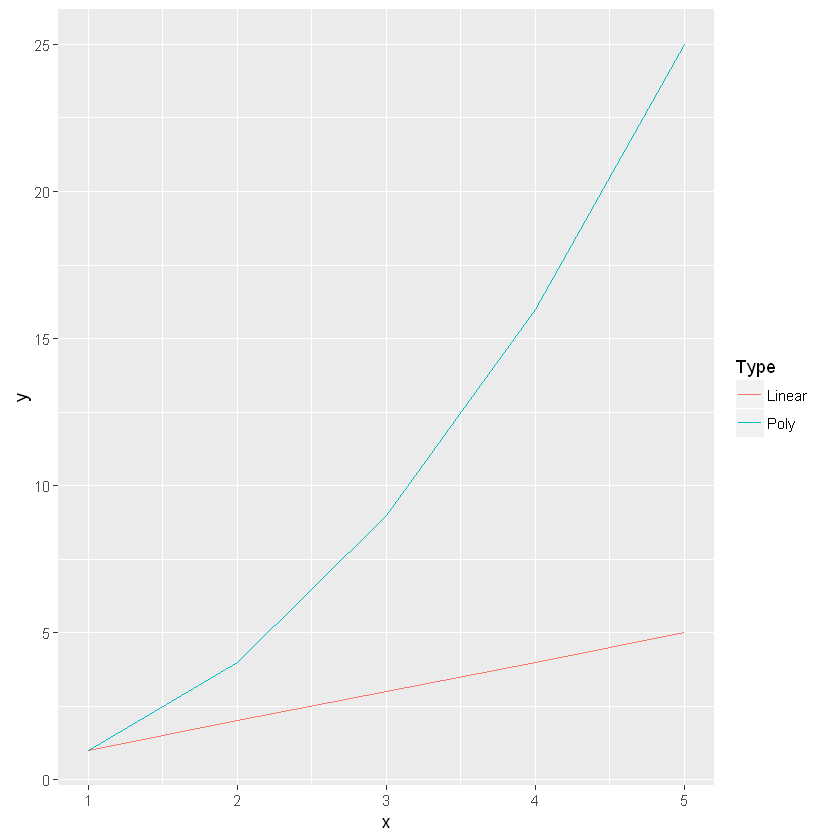

In [66]:
# here's an example of two curves ... one is linear, the other is polynomial
data1 <- data.frame(Type = rep("Linear",5), x = 1:5, y = 1:5 )
data2 <- data.frame(Type = rep("Poly", 5),  x = 1:5, y =(1:5)^2)
data <- rbind(data1, data2)
#ggplot(data) +
#  geom_line(aes(y = Linear)) + 
#  geom_line(aes(y = Poly))
ggplot(data, aes(x=x, y=y, colour=Type)) + geom_line()

# if you used linear regression to predict y for polynomial data, you'd be way off

In [116]:
# Importing the dataset
dataset = read.csv('Position_Salaries.csv')
# Let's assume Position corresponds to Level .... 
# meaning Business Analyst is lowest position (1) and CEO is highest (10)
dataset

Position,Level,Salary
Business Analyst,1,45000
Junior Consultant,2,50000
Senior Consultant,3,60000
Manager,4,80000
Country Manager,5,110000
Region Manager,6,150000
Partner,7,200000
Senior Partner,8,300000
C-level,9,500000
CEO,10,1000000


In [117]:
# so now we don't need the first column because the second column will do the trick in this case
dataset = dataset[2:3] 
head(dataset)

Level,Salary
1,45000
2,50000
3,60000
4,80000
5,110000
6,150000


In [118]:
# Let's build a Linear Regression model so we can compare results later to polynomial model
# Fitting Linear Regression to the dataset
lin_reg = lm(formula = Salary ~ ., data = dataset)
# lin_reg

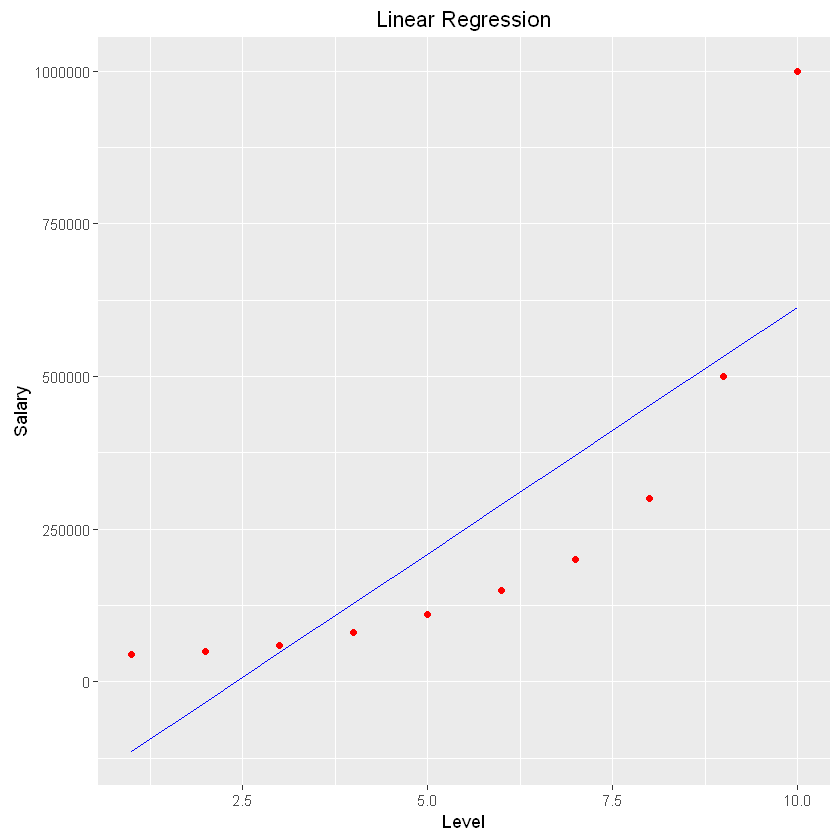

In [119]:
# Visualising the Linear Regression results

ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = dataset$Level, y = predict(lin_reg, newdata = dataset)),
            colour = 'blue') +
  ggtitle('Linear Regression') +
  xlab('Level') +
  ylab('Salary')

# you can see some of the Salaries are way off the predicted line

In [120]:
# now let's build a polynomial regression model
# Fitting Polynomial Regression to the dataset
# first we need to create "dummy" variables that will contain the polynomial terms of Level
dataset$Level2 = dataset$Level^2
dataset$Level3 = dataset$Level^3
dataset$Level4 = dataset$Level^4
head(dataset)
poly_reg = lm(formula = Salary ~ .,
              data = dataset)


Level,Salary,Level2,Level3,Level4
1,45000,1,1,1
2,50000,4,8,16
3,60000,9,27,81
4,80000,16,64,256
5,110000,25,125,625
6,150000,36,216,1296


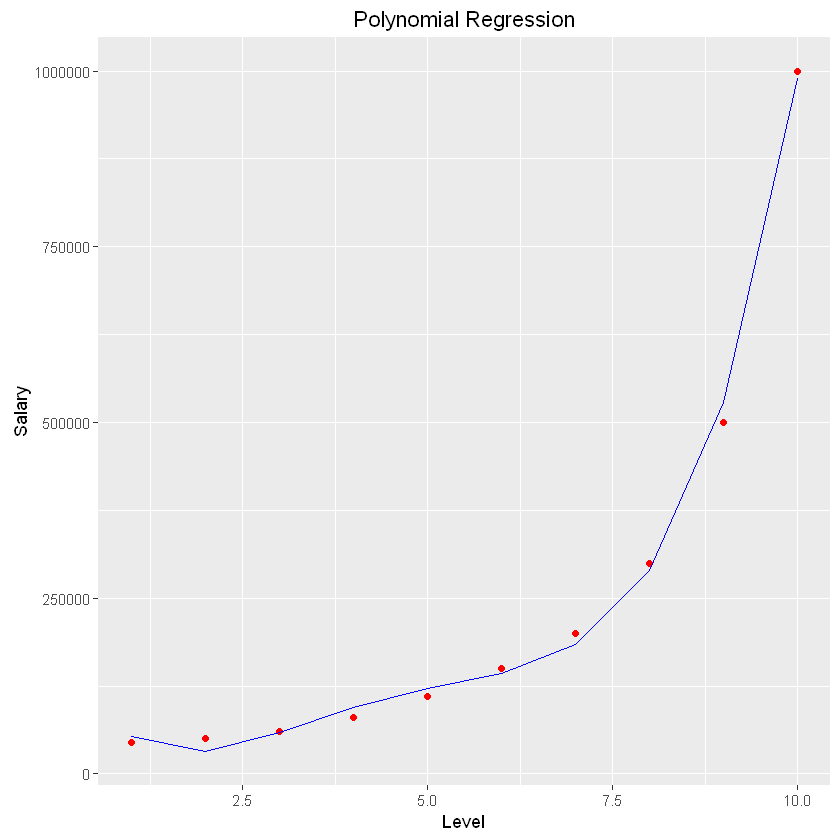

In [121]:
# Visualising the Polynomial Regression results
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = dataset$Level, y = predict(poly_reg, newdata = dataset)),
            colour = 'blue') +
  ggtitle('Polynomial Regression') +
  xlab('Level') +
  ylab('Salary')

# much better ... now the predicatd line is very close to the actual salaries

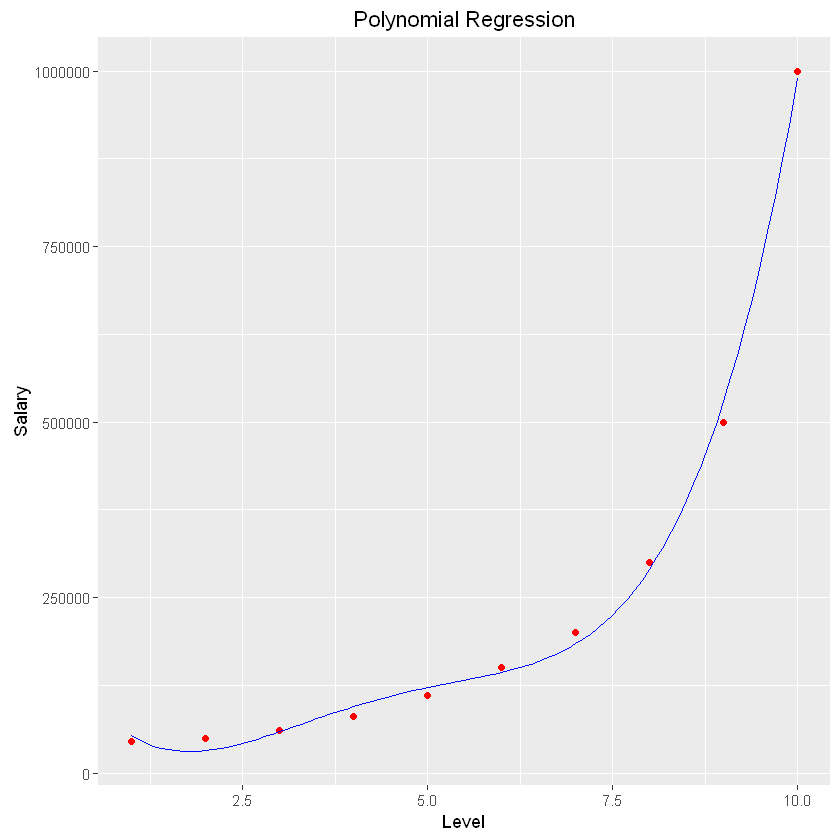

In [122]:
# Visualising the Regression Model results (for higher resolution and smoother curve)
x_grid = seq(min(dataset$Level), max(dataset$Level), 0.1)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = x_grid, y = predict(poly_reg,
                                        newdata = data.frame(Level = x_grid,
                                                             Level2 = x_grid^2,
                                                             Level3 = x_grid^3,
                                                             Level4 = x_grid^4))),
            colour = 'blue') +
  ggtitle('Polynomial Regression') +
  xlab('Level') +
  ylab('Salary')

In [105]:
# Now let's see how good are model is linear vs. polynomial regresssion

# What is the salary for someone with a Level of 6.5 (half-way between Regional Manager and Partner)
# What is the salary for someone with a Level of 9.5 (close to becoming a CEO)

# Predicting a new result with Linear Regression
print ("Predications with Linear Regression")
pred_lin = predict(lin_reg, data.frame(Level = c(6.5, 9.5)))
round(pred_lin)

# Predicting a new result with Polynomial Regression
print ("Predications with Polynomial Regression")
pred_poly = predict(poly_reg, data.frame(Level = c(6.5, 9.5),
                             Level2 = c(6.5^2, 9.5^2),
                             Level3 = c(6.5^3, 9.5^2),
                             Level4 = c(6.5^4, 9.5^2)))
round(pred_poly)
# with linear regression you'd underpay, very significantly for a C-Level executive!

[1] "Predications with Linear Regression"


1      2 
330379 573015

[1] "Predications with Polynomial Regression"


1       2 
 158862 5417000

## Support Vector Regression


In [123]:
# Importing the dataset
dataset = read.csv('Position_Salaries.csv')

In [124]:
# so now we don't need the first column because the second column will do the trick in this case
dataset = dataset[2:3] 
head(dataset)

Level,Salary
1,45000
2,50000
3,60000
4,80000
5,110000
6,150000


In [138]:
# Fitting SVR to the dataset
regressor = svm(formula = Salary ~ .,
                data = dataset,
                type = 'eps-regression',
                kernel = 'radial')

In [140]:
# Predicting a new result
y_pred = predict(regressor, data.frame(Level = 6.5))
paste('predicted salary for level 6.5 is ', round(y_pred), sep="")

[1] "predicted salary for level 6.5 is 177861"

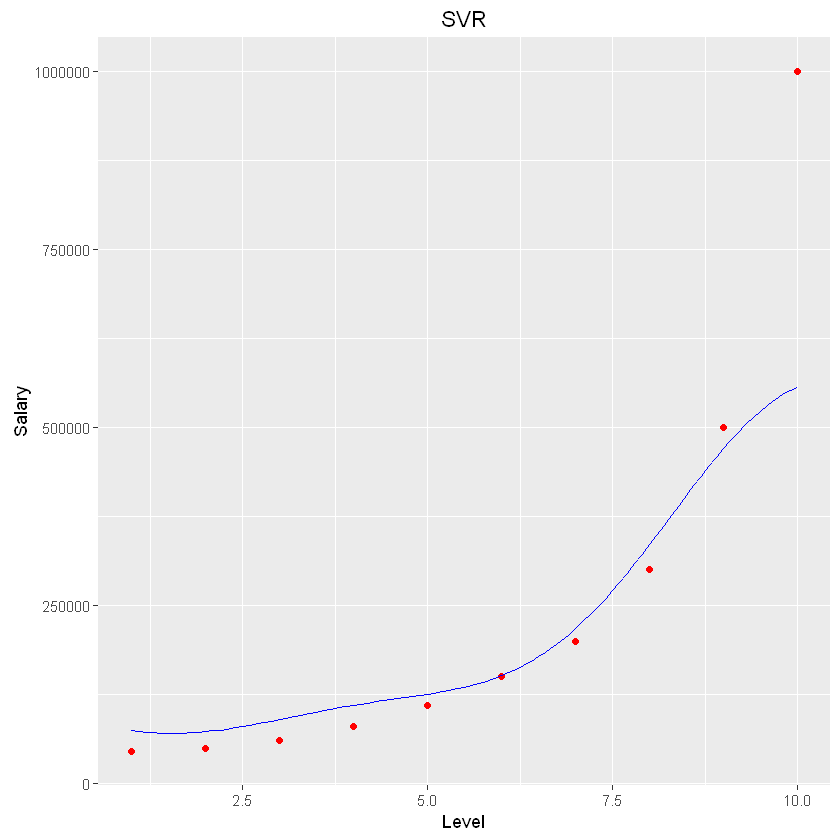

In [127]:
# Visualising the SVR results (for higher resolution and smoother curve)
x_grid = seq(min(dataset$Level), max(dataset$Level), 0.1)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = x_grid, y = predict(regressor, newdata = data.frame(Level = x_grid))),
            colour = 'blue') +
  ggtitle('SVR') +
  xlab('Level') +
  ylab('Salary')

# Notice the CEO salary is not in the predicted line ... that's because SVR considered it an outlier
# use additional parameters (for example change type) to see different behavior

## Decision Tree Regression


In [128]:
# Importing the dataset
dataset = read.csv('Position_Salaries.csv')
dataset = dataset[2:3]

In [145]:
# Fitting Decision Tree Regression to the dataset
regressor = rpart(formula = Salary ~ .,
                  data = dataset,
                  control = rpart.control(minsplit = 1)
                  )

In [136]:
# Predicting a new result with Decision Tree Regression
y_pred = predict(regressor, data.frame(Level = 6.5))
paste('predicted salary for level 6.5 is ', y_pred, sep="")

[1] "predicted salary for level 6.5 is 250000"

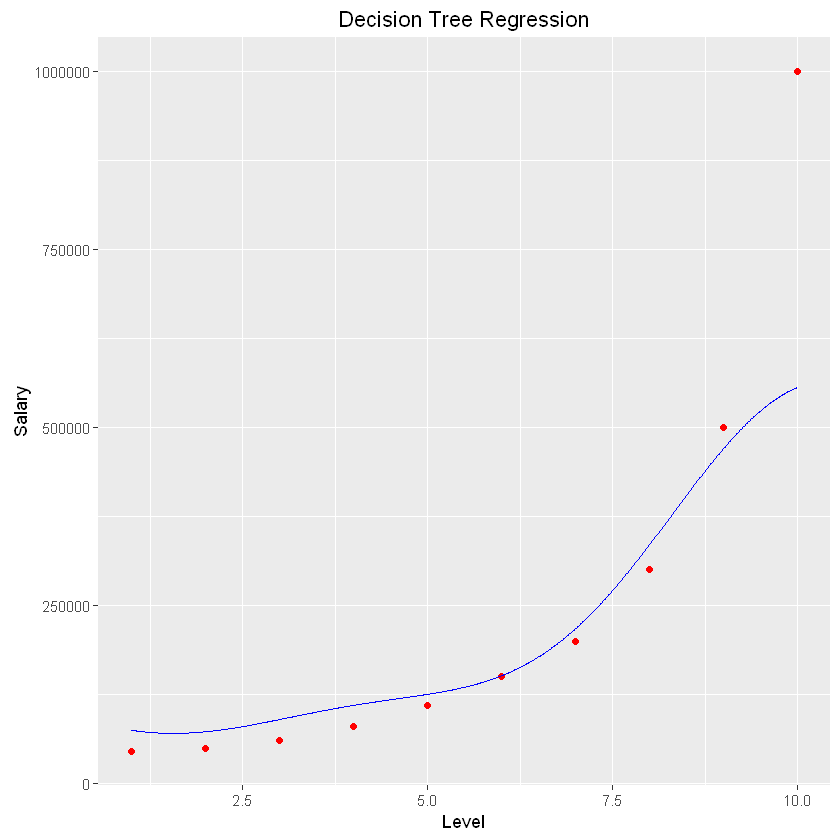

In [141]:
x_grid = seq(min(dataset$Level), max(dataset$Level), 0.01)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = x_grid, y = predict(regressor, newdata = data.frame(Level = x_grid))),
            colour = 'blue') +
  ggtitle('Decision Tree Regression') +
  xlab('Level') +
  ylab('Salary')

# because of the way DTR works, each y value in a cluster will have the same value (average value of all points)
# that's why you see constant values in each cluster
# in this case 250000 seems too high, but if had more data the value would have been closer

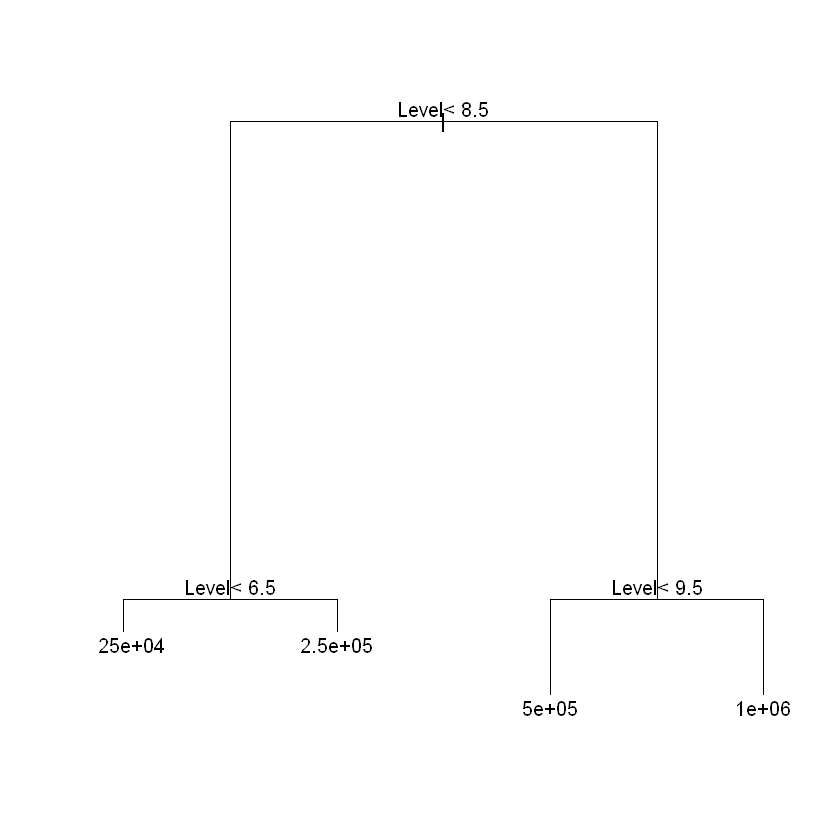

In [149]:
# Plotting the tree
# you can see where the splits occur (the decisions)
plot(regressor)
text(regressor)

## Random Forest Regression


In [150]:
# Importing the dataset
dataset = read.csv('Position_Salaries.csv')
dataset = dataset[2:3]

In [166]:
set.seed(1234)
# note the value of ntree ... 
regressor = randomForest(x = dataset[-2],
                         y = dataset$Salary,
                         ntree = 10)

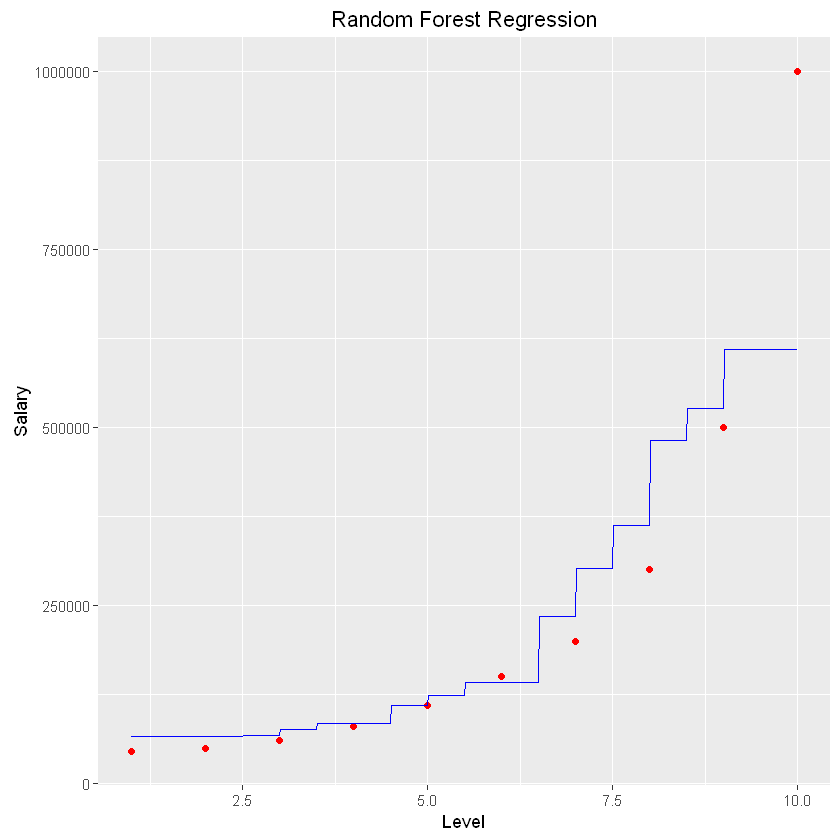

In [167]:
x_grid = seq(min(dataset$Level), max(dataset$Level), 0.01)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = x_grid, y = predict(regressor, newdata = data.frame(Level = x_grid))),
            colour = 'blue') +
  ggtitle('Random Forest Regression') +
  xlab('Level') +
  ylab('Salary')

In [158]:
# Predicting a new result with Random Forest Regression
y_pred = predict(regressor, data.frame(Level = 6.5))
paste('predicted salary using RFR with ntree of 10 for level 6.5 is ', round(y_pred), sep="")

[1] "predicted salary using RFR with ntree of 10 for level 6.5 is 141733"

In [168]:
set.seed(1234)
# note the value of ntree ... 
regressor = randomForest(x = dataset[-2],
                         y = dataset$Salary,
                         ntree = 500)

In [163]:
# Predicting a new result with Random Forest Regression
y_pred = predict(regressor, data.frame(Level = 6.5))
paste('predicted salary using RFR with ntree of 500 for level 6.5 is ', round(y_pred), sep="")

# generally the higher the number of ntree the bette the prediction will be

[1] "predicted salary using RFR with ntree of 500 for level 6.5 is 160458"

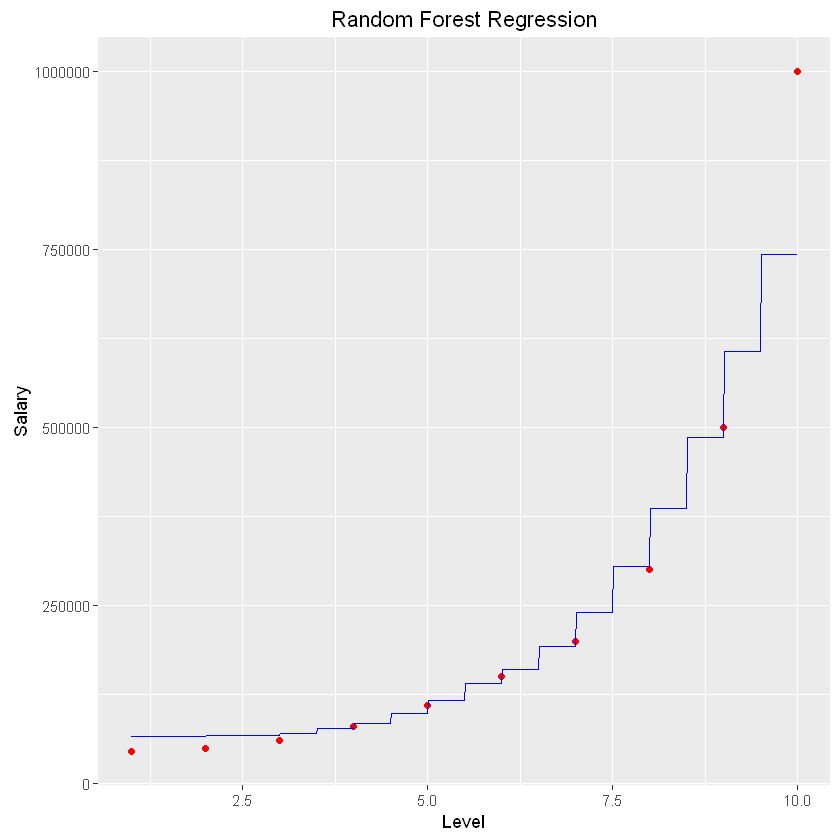

In [170]:
x_grid = seq(min(dataset$Level), max(dataset$Level), 0.01)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = x_grid, y = predict(regressor, newdata = data.frame(Level = x_grid))),
            colour = 'blue') +
  ggtitle('Random Forest Regression') +
  xlab('Level') +
  ylab('Salary')

# with ntree of 500 the salaries are much more closer 